In [3]:
!pip install ultralytics

You should consider upgrading via the 'C:\Users\Vasu Sumeet Seth\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


PREPROCESSING

In [ ]:
import cv2
import numpy as np
import os
from glob import glob

# Define preprocessing function
def preprocess_underwater_image(image_path, save_dir):
    """Preprocess an underwater image to enhance clarity before YOLO detection"""

    # Load image
    img = cv2.imread(image_path)

    # Check if image loaded correctly
    if img is None:
        print(f"Error loading image: {image_path}")
        return

    # Get image dimensions
    h, w, c = img.shape
    print(f"Processing {os.path.basename(image_path)} - Dimensions: {w}x{h}, Channels: {c}")

    # Convert to LAB color space for color correction
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to L-channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l = clahe.apply(l)

    # Merge channels and convert back to BGR
    lab = cv2.merge((l, a, b))
    img_corrected = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # Apply Non-Local Means Denoising
    img_denoised = cv2.fastNlMeansDenoisingColored(img_corrected, None, 10, 10, 7, 21)

    # Apply Unsharp Masking for sharpness
    gaussian_blur = cv2.GaussianBlur(img_denoised, (9,9), 10)
    img_sharpened = cv2.addWeighted(img_denoised, 1.5, gaussian_blur, -0.5, 0)
     
    # Apply Gamma Correction
    gamma = 1.2  
    lookUpTable = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    img_gamma_corrected = cv2.LUT(img_sharpened, lookUpTable)

    
    save_path = os.path.join(save_dir, os.path.basename(image_path))
    cv2.imwrite(save_path, img_gamma_corrected)

# Define directories
image_folder = "D:/Projects/Underwater Plastic Waste Detection/underwater_plastics/train/images"
save_folder = "D:/Projects/Underwater Plastic Waste Detection/underwater_plastics/train/processed_images"

# Create the save directory if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

# Process all images in the directory
image_paths = glob(os.path.join(image_folder, "*.jpg"))

for img_path in image_paths:
    preprocess_underwater_image(img_path, save_folder)

print("Preprocessing complete. Processed images saved in 'processed_images' folder.")

In [4]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


image = cv2.imread("D:/Projects/Underwater Plastic Waste Detection/up_1/underwater_plastics/train/images/1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


# YOLOv8 configuration


image 1/1 D:\Projects\Underwater Plastic Waste Detection\up_1\underwater_plastics\train\images\1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg: 640x640 (no detections), 10.6ms
Speed: 8.3ms preprocess, 10.6ms inference, 51.6ms postprocess per image at shape (1, 3, 640, 640)


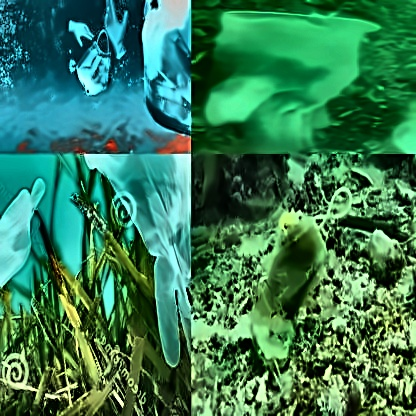

In [5]:
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "D:/Projects/Underwater Plastic Waste Detection/up_1/underwater_plastics/train/images/1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


True
1
NVIDIA GeForce RTX 3060 Laptop GPU


# Fine-tuning process log of YOLOv8

In [6]:

Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  


Result_Final_model = Final_model.train(data="D:/Projects/Underwater Plastic Waste Detection/up_1/underwater_plastics/data.yaml",epochs=4, imgsz = 640, batch = 16 ,lr0=0.01, dropout= 0.15, device = 0)

Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.116 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.94  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=D:/Projects/Underwater Plastic Waste Detection/up_1/underwater_plastics/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train20, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_b

train: Scanning D:\Projects\Underwater Plastic Waste Detection\up_1\underwater_plastics\train\labels.cache... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:00<?, ?it/s]
val: Scanning D:\Projects\Underwater Plastic Waste Detection\up_1\underwater_plastics\valid\labels.cache... 1001 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]


Plotting labels to runs\detect\train20\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train20
Starting training for 4 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/4      2.46G      1.458      3.335      1.619         48        640: 100%|██████████| 227/227 [00:52<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.11it/s]


                   all       1001       1891      0.715      0.215      0.212      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/4      2.89G      1.446      2.541      1.581         57        640: 100%|██████████| 227/227 [00:46<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]


                   all       1001       1891      0.731       0.25      0.275      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/4      2.89G      1.405      2.267      1.549         51        640: 100%|██████████| 227/227 [00:46<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]


                   all       1001       1891      0.657      0.307      0.308      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/4      2.89G      1.358      2.078      1.494         59        640: 100%|██████████| 227/227 [00:46<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.18it/s]


                   all       1001       1891      0.784      0.324       0.36      0.231

4 epochs completed in 0.067 hours.
Optimizer stripped from runs\detect\train20\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train20\weights\best.pt, 6.2MB

Validating runs\detect\train20\weights\best.pt...
Ultralytics 8.3.94  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       1001       1891      0.785      0.323      0.361      0.231
                  Mask         77         90      0.598      0.281      0.411      0.236
                   can         18         20          1          0     0.0143     0.0043
             cellphone         61         71       0.79      0.846      0.907      0.724
           electronics         27         40       0.74        0.1      0.196      0.117
               gbottle         36         82      0.411      0.439      0.365      0.207
                 glove         37         55      0.508      0.745      0.704      0.497
                 metal         10         22          1          0    0.00742    0.00218
                  misc         48         51          1          0     0.0745     0.0391
                   net        146        148      0.722      0.622      0.716      0.394
                  pbag        290        330      0.707      0.858       0.86      0.686
               pbottl

# Training performance metrics

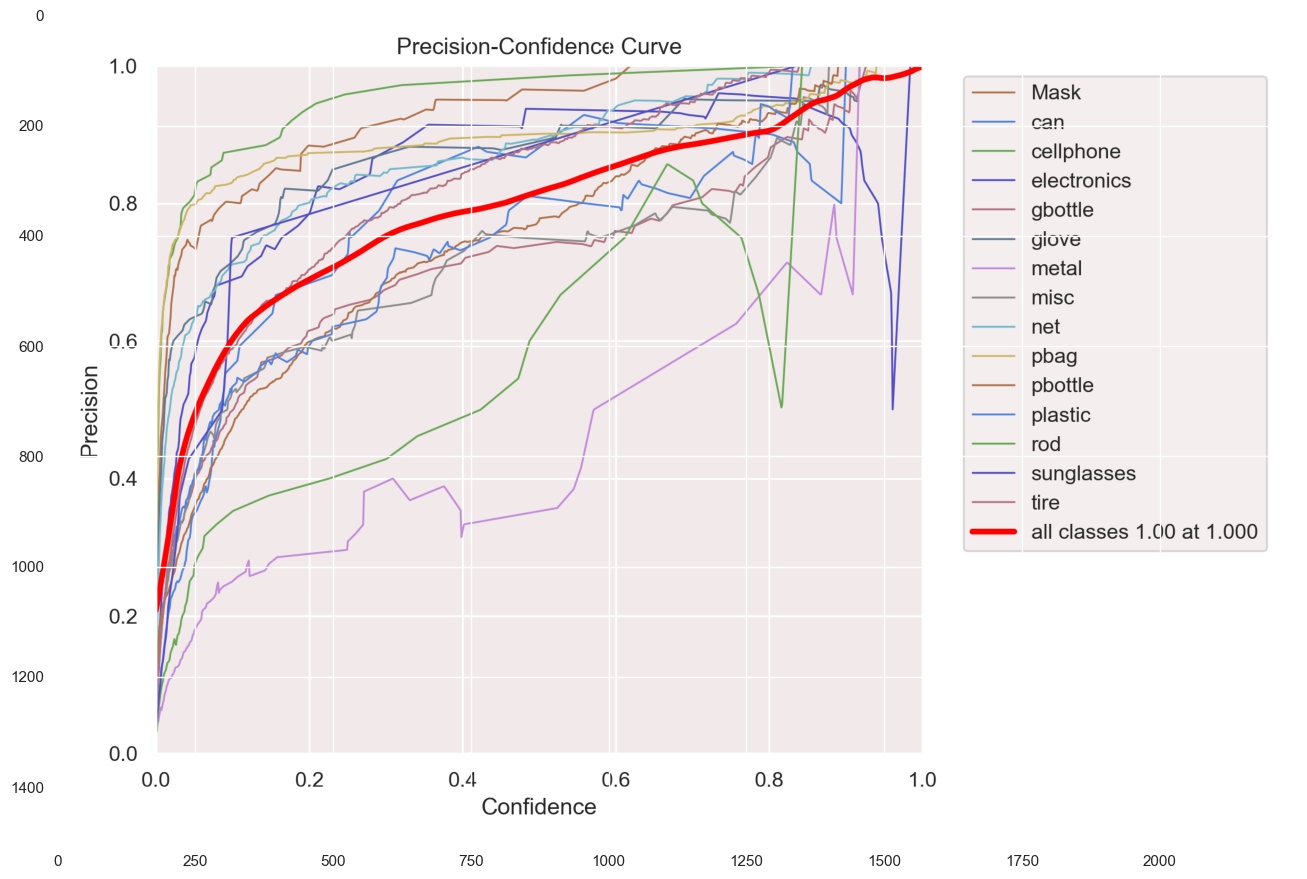

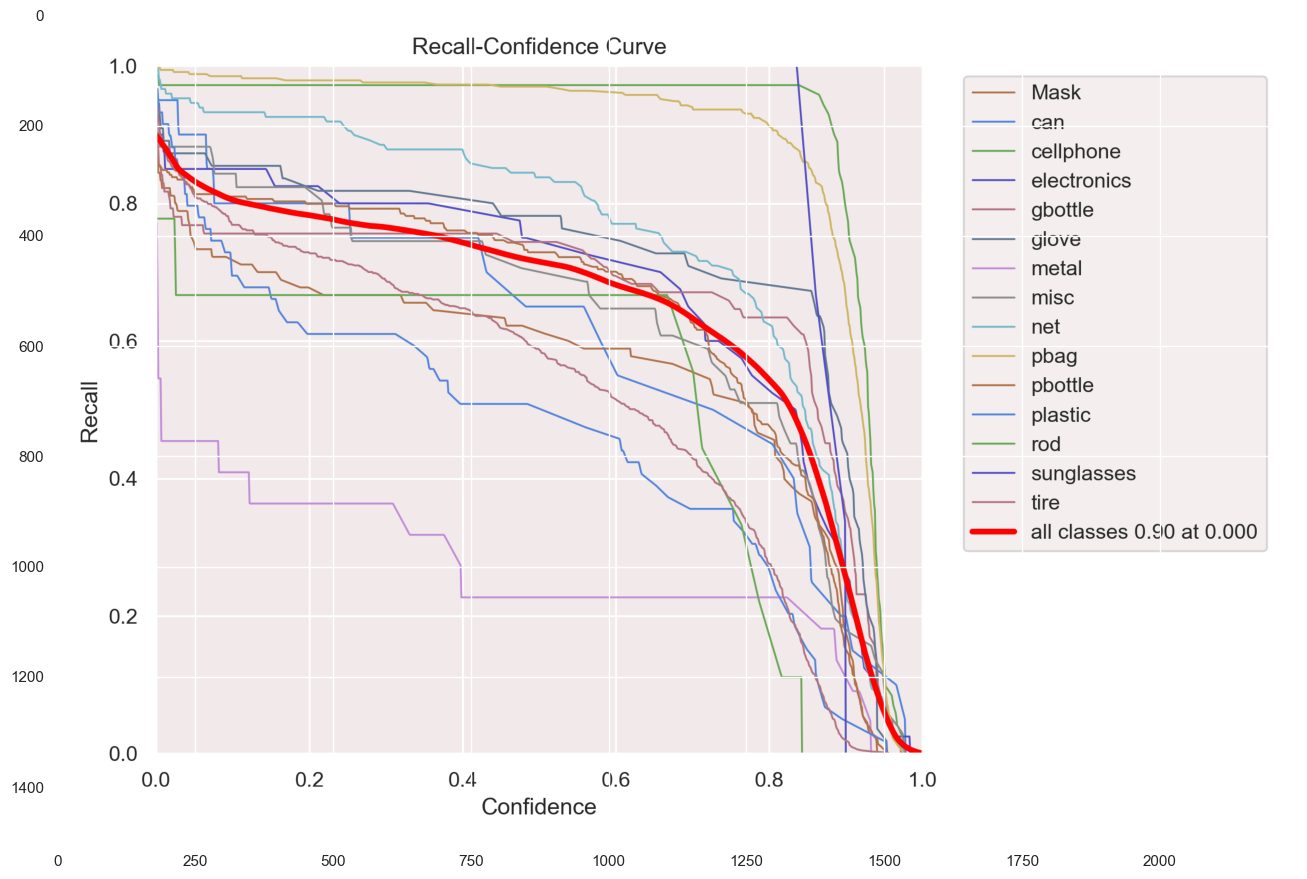

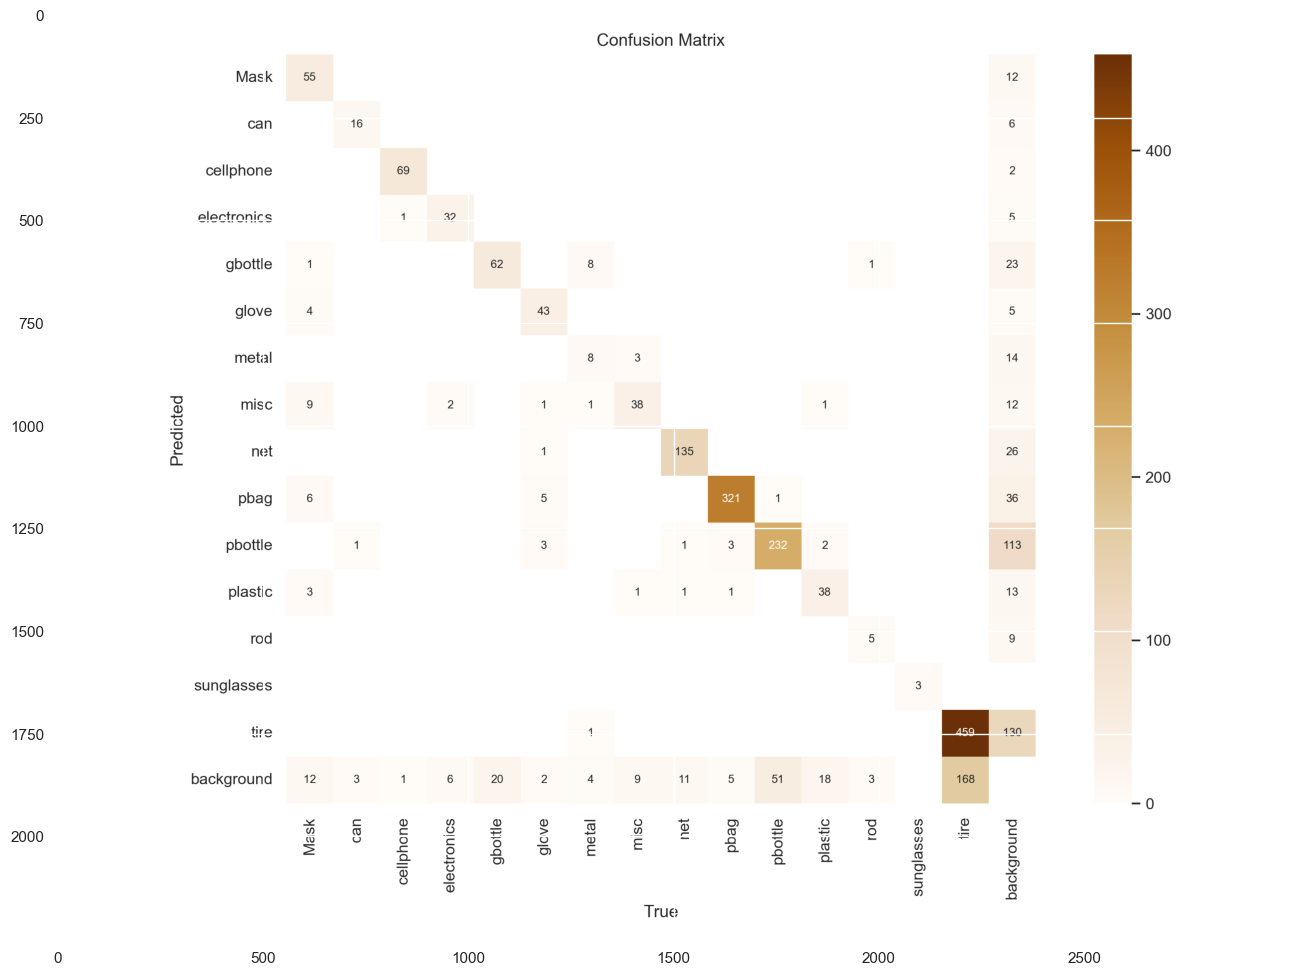

In [9]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]
for i in list_of_metrics:
    img = cv2.imread(f"D:/Projects/Underwater Plastic Waste Detection/code/runs/detect/train20-Preprocessed-100 Epochs/{i}")
    plt.figure(figsize = (16, 12))
    plt.imshow(np.array(img))
    plt.show()

In [11]:
results = pd.read_csv("D:/Projects/Underwater Plastic Waste Detection/code/runs/detect/train20-Preprocessed-100 Epochs/results.csv")
results.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,92.1884,1.45769,3.33497,1.61874,0.71546,0.21519,0.21163,0.12301,1.50192,2.50002,1.84951,0.000175,0.000175,0.000175
1,2,142.3380,1.46411,2.55280,1.59375,0.58947,0.25581,0.24360,0.14010,1.54539,2.18722,1.88929,0.000346,0.000346,0.000346
2,3,210.7890,1.46768,2.34713,1.59577,0.63090,0.24642,0.25780,0.15719,1.48504,2.09947,1.78373,0.000515,0.000515,0.000515
3,4,258.5200,1.45763,2.21041,1.57821,0.57152,0.29744,0.29947,0.17486,1.48761,1.98767,1.79686,0.000510,0.000510,0.000510
4,5,307.0350,1.44164,2.04879,1.56419,0.69623,0.23627,0.29031,0.17653,1.46808,2.08620,1.79881,0.000505,0.000505,0.000505


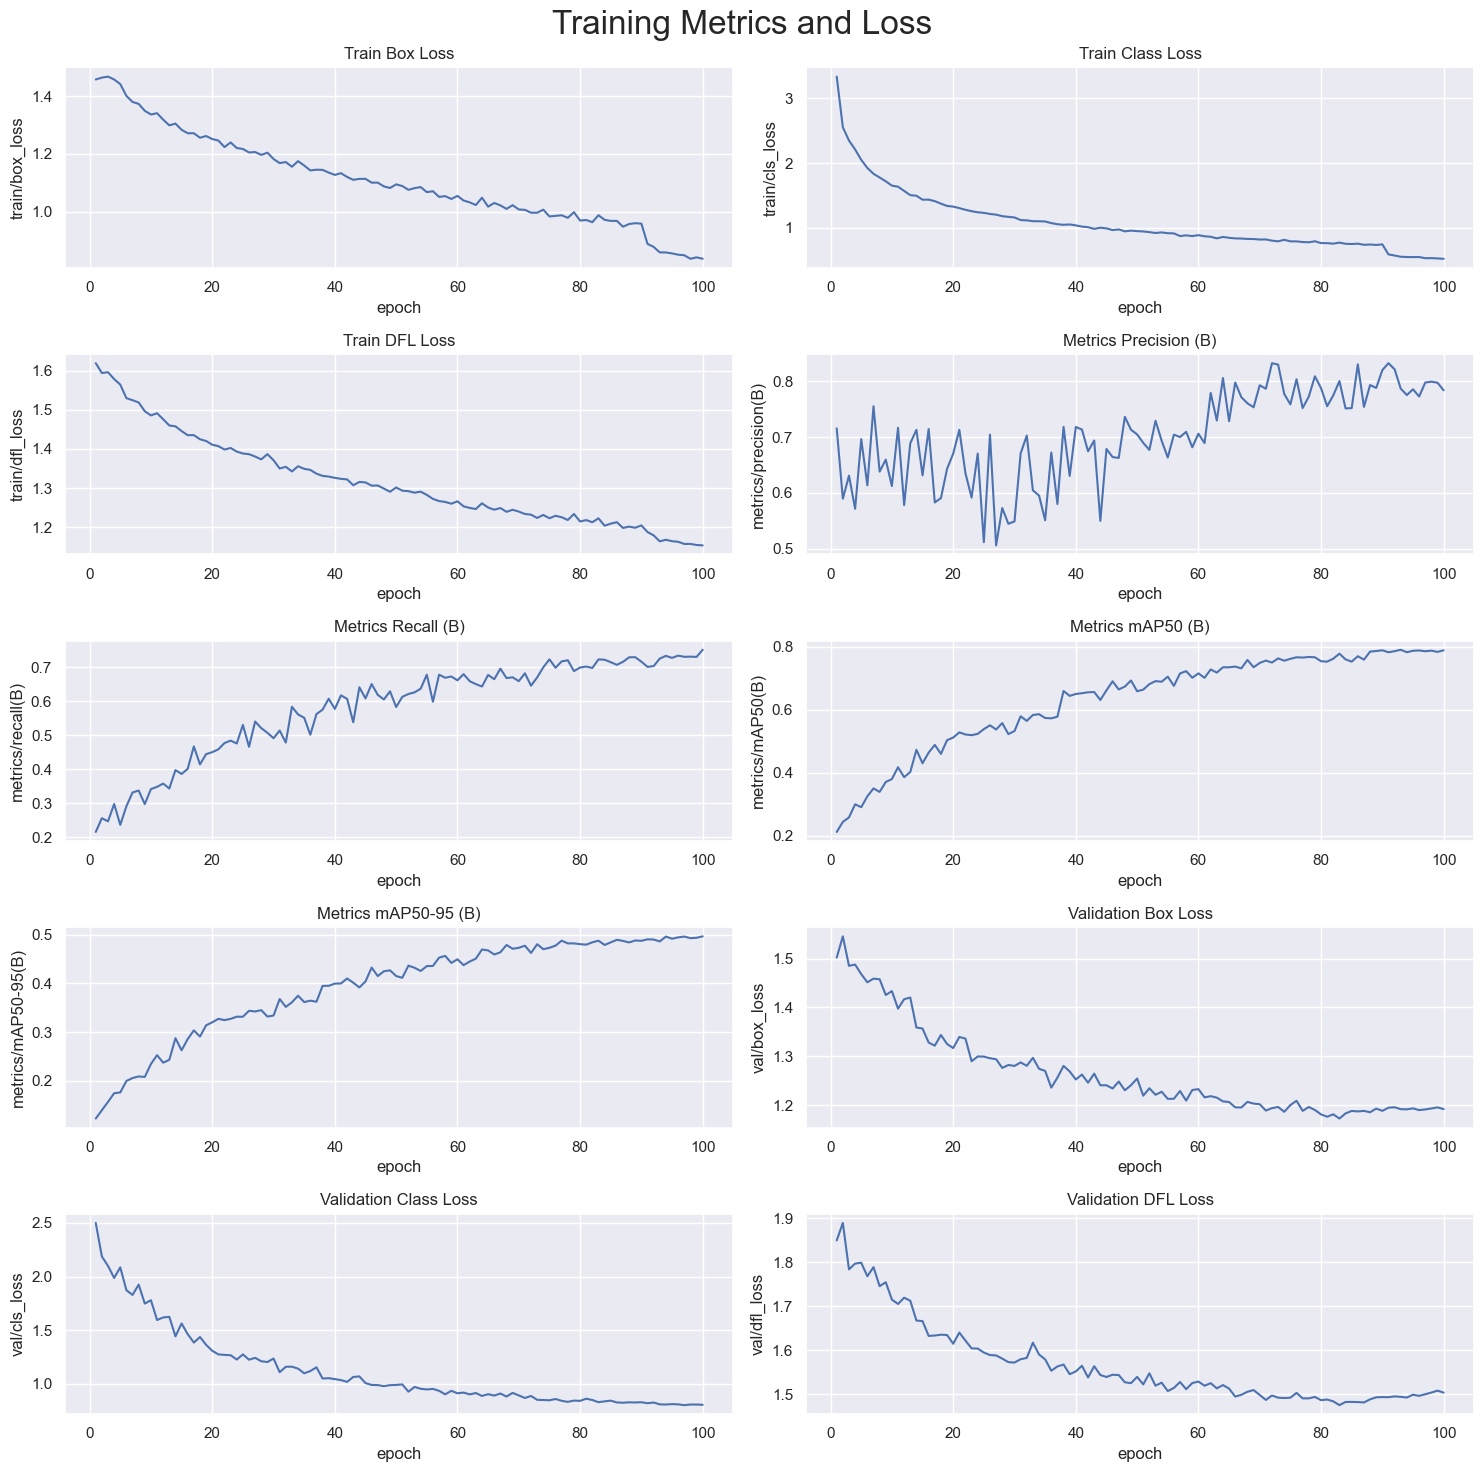

In [12]:
results.columns = results.columns.str.strip()
# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=results, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=results, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=results, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=results, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=results, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=results, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=results, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=results, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

Evaluation and Validation of YOLO Model


In [18]:
# Loading the best performing model
Valid_model = YOLO('D:/Projects/Underwater Plastic Waste Detection/code/runs/detect/train20-Preprocessed-100 Epochs/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.94  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\Projects\Underwater Plastic Waste Detection\up_1\underwater_plastics\test\labels.cache... 501 images, 0 backgrounds, 0 corrupt: 100%|██████████| 501/501 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


                   all        501        966      0.777       0.73      0.738      0.463
                  Mask         33         37      0.966      0.778      0.886      0.652
                   can         13         19      0.825      0.579      0.666      0.379
             cellphone         40         46      0.985          1      0.995      0.874
           electronics         14         19      0.824      0.842      0.869      0.548
               gbottle         27         63       0.95      0.603      0.732      0.444
                 glove         23         34       0.92      0.765      0.826      0.646
                 metal          2          5      0.544          1      0.553      0.144
                  misc         30         33       0.67      0.424      0.619      0.336
                   net         63         65      0.919      0.877      0.954      0.642
                  pbag        128        166      0.836      0.964      0.958      0.823
               pbottl

In [14]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.7773562132320654
metrics/recall(B):  0.7299496871574322
metrics/mAP50(B):  0.7382935379660697
metrics/mAP50-95(B):  0.46313110447511613


Predicting and Detecting Microplastic Waste


image 1/1 D:\Projects\Underwater Plastic Waste Detection\up_1\underwater_plastics\test\images\1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd30463da5e4b94a48be.jpg: 640x640 1 glove, 122.9ms
Speed: 338.4ms preprocess, 122.9ms inference, 43.6ms postprocess per image at shape (1, 3, 640, 640)


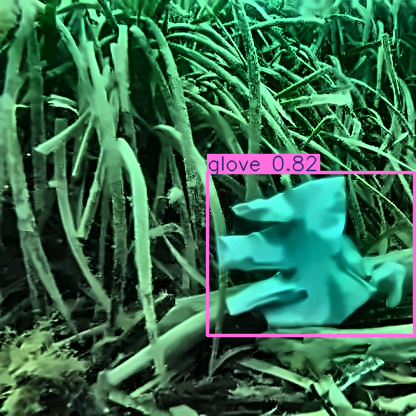


image 1/1 D:\Projects\Underwater Plastic Waste Detection\up_1\underwater_plastics\test\images\200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.e06b1a6873ec4240c3493f281822c9d9.jpg: 640x640 1 Mask, 1 pbottle, 15.0ms
Speed: 5.5ms preprocess, 15.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


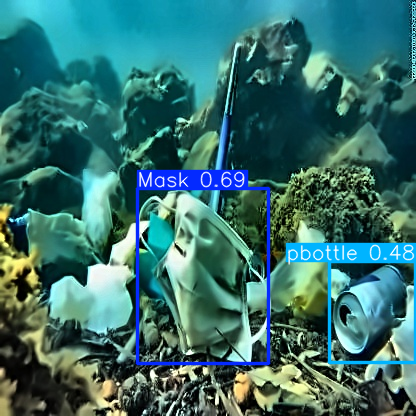


image 1/1 D:\Projects\Underwater Plastic Waste Detection\up_1\underwater_plastics\test\images\66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.33eb90a2198eccbfbc6e7961b953ac4a.jpg: 640x640 1 Mask, 1 misc, 1 plastic, 13.9ms
Speed: 5.3ms preprocess, 13.9ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)


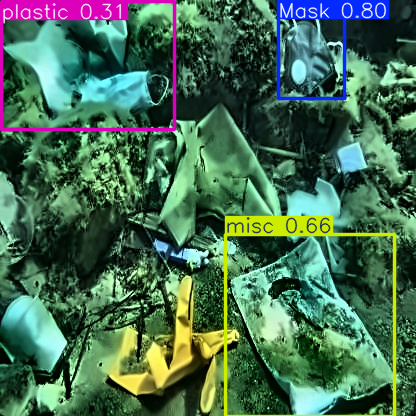


image 1/1 D:\Projects\Underwater Plastic Waste Detection\up_1\underwater_plastics\test\images\7_JPG_jpg.rf.3bf999e1c1e0a9a932b23d95b27357dc.jpg: 640x640 1 Mask, 15.7ms
Speed: 6.6ms preprocess, 15.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


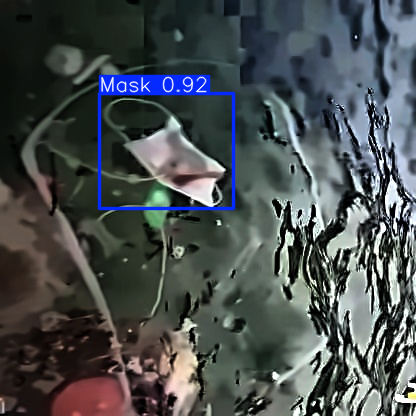


image 1/1 D:\Projects\Underwater Plastic Waste Detection\up_1\underwater_plastics\test\images\ailnlmva_jpg.rf.116e0b65179da59d199d555cb48ed605.jpg: 640x640 1 Mask, 15.6ms
Speed: 4.2ms preprocess, 15.6ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


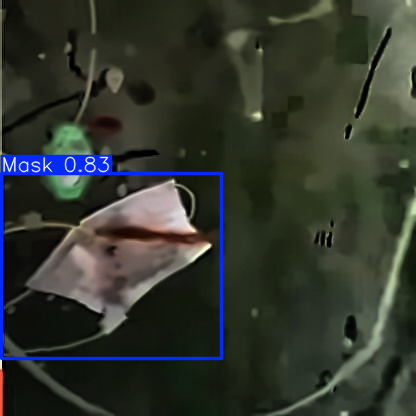

In [16]:
images = os.listdir("D:/Projects/Underwater Plastic Waste Detection/up_1/underwater_plastics/test/images")
for i in range(5):
    image = os.path.join("D:/Projects/Underwater Plastic Waste Detection/up_1/underwater_plastics/test/images", images[i])
    result_predict = Valid_model.predict(source = image, imgsz=(640), iou=0.4)

    # show results
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))